In [4]:
import pandas as pd

In [12]:
#import streamlit as st
from PIL import Image
import pandas as pd
import base64
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import json
import time

ContextualVersionConflict: (pytz 2019.3 (/usr/lib/python3/dist-packages), Requirement.parse('pytz>=2020.1'), {'pandas'})

In [ ]:


st.set_page_config(layout="wide")
#---------------------------------#
# Title
image = Image.open("./images/logo.jpg")

st.image(image, width=500)

st.title("Crypto Price App")
st.markdown(
    """
This app retrieves cryptocurrency prices for the top 100 cryptocurrency from the **CoinMarketCap**!

"""
)
# ---------------------------------#
# About
expander_bar = st.expander("About")
expander_bar.markdown(
    """
* **Python libraries:** base64, pandas, streamlit, numpy, matplotlib, seaborn, BeautifulSoup, requests, json, time
* **Data source:** [CoinMarketCap](http://coinmarketcap.com).
* **Credit:** Web scraper adapted from the Medium article *[Web Scraping Crypto Prices With Python](https://towardsdatascience.com/web-scraping-crypto-prices-with-python-41072ea5b5bf)* written by [Bryan Feng](https://medium.com/@bryanf).
"""
)


# ---------------------------------#
# Page layout (continued)
# Divide page to 3 columns (col1 = sidebar, col2 and col3 = page contents)
col1 = st.sidebar
col2, col3 = st.columns((2, 1))

# ---------------------------------#
# Sidebar + Main panel
col1.header("Input Options")

# Sidebar - Currency price unit
currency_price_unit = col1.selectbox("Select currency for price", ("USD", "BTC", "ETH"))

# Web scraping of CoinMarketCap data
@st.cache
def load_data():
    cmc = requests.get("https://coinmarketcap.com")
    soup = BeautifulSoup(cmc.content, "html.parser")

    data = soup.find("script", id="__NEXT_DATA__", type="application/json")
    coins = {}
    coin_data = json.loads(data.contents[0])
    listings = coin_data["props"]["initialState"]["cryptocurrency"]["listingLatest"][
        "data"
    ]

    attributes = listings[0]["keysArr"]
    index_of_id = attributes.index("id")
    index_of_slug = attributes.index("slug")

    for i in listings[1:]:
        coins[str(i[index_of_id])] = i[index_of_slug]

    coin_name = []
    coin_symbol = []
    market_cap = []
    percent_change_1h = []
    percent_change_24h = []
    percent_change_7d = []
    price = []
    volume_24h = []

    index_of_slug = attributes.index("slug")
    index_of_symbol = attributes.index("symbol")

    index_of_quote_currency_price = attributes.index(
        f"quote.{currency_price_unit}.price"
    )
    index_of_quote_currency_percent_change_1h = attributes.index(
        f"quote.{currency_price_unit}.percentChange1h"
    )
    index_of_quote_currency_percent_change_24h = attributes.index(
        f"quote.{currency_price_unit}.percentChange24h"
    )
    index_of_quote_currency_percent_change_7d = attributes.index(
        f"quote.{currency_price_unit}.percentChange7d"
    )
    index_of_quote_currency_market_cap = attributes.index(
        f"quote.{currency_price_unit}.marketCap"
    )
    index_of_quote_currency_volume_24h = attributes.index(
        f"quote.{currency_price_unit}.volume24h"
    )

    for i in listings[1:]:
        coin_name.append(i[index_of_slug])
        coin_symbol.append(i[index_of_symbol])

        price.append(i[index_of_quote_currency_price])
        percent_change_1h.append(i[index_of_quote_currency_percent_change_1h])
        percent_change_24h.append(i[index_of_quote_currency_percent_change_24h])
        percent_change_7d.append(i[index_of_quote_currency_percent_change_7d])
        market_cap.append(i[index_of_quote_currency_market_cap])
        volume_24h.append(i[index_of_quote_currency_volume_24h])

    df = pd.DataFrame(
        columns=[
            "coin_name",
            "coin_symbol",
            "market_cap",
            "percent_change_1h",
            "percent_change_24h",
            "percent_change_7d",
            "price",
            "volume_24h",
        ]
    )
    df["coin_name"] = coin_name
    df["coin_symbol"] = coin_symbol
    df["price"] = price
    df["percent_change_1h"] = percent_change_1h
    df["percent_change_24h"] = percent_change_24h
    df["percent_change_7d"] = percent_change_7d
    df["market_cap"] = market_cap
    df["volume_24h"] = volume_24h
    return df


In [11]:
df = load_data
df

<function __main__.load_data()>

In [31]:
df = pd.read_csv('formatoDF.csv')
df
#df = df.drop([1], axis=1)

,Unnamed: 0,coin_name,coin_symbol,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,price,volume_24h
0,0,bitcoin,BTC,8.094796e+11,-0.450896,-0.577574,2.627554,42702.910122,1.984044e+10
1,1,ethereum,ETH,3.536442e+11,-0.414142,-1.880508,-1.889655,2958.055321,1.291274e+10
2,2,tether,USDT,7.847678e+10,-0.005053,0.002908,0.002351,1.000685,5.467715e+10
3,3,bnb,BNB,6.667368e+10,-0.339345,-0.620463,-2.234102,403.797176,1.546381e+09
4,4,usd-coin,USDC,5.230860e+10,-0.008794,0.048707,0.021142,0.999752,3.395209e+09
...,...,...,...,...,...,...,...,...,...
95,95,xinfin,XDC,7.353470e+08,-0.566984,-2.620426,-3.448386,0.059760,7.846472e+06
96,96,ravencoin,RVN,7.135640e+08,-1.619095,-2.852896,-8.204525,0.068132,4.422428e+07
97,97,1inch,1INCH,7.059438e+08,-0.858675,-3.561478,-4.636413,1.698028,6.798093e+07
98,98,renbtc,RENBTC,6.915717e+08,0.011635,0.022159,3.081997,42500.357713,1.915329e+06


In [32]:
sorted_coin = sorted(df["coin_symbol"])
selected_coin = col1.multiselect("Cryptocurrency", sorted_coin, sorted_coin)

df_selected_coin = df[(df["coin_symbol"].isin(selected_coin))]  # Filtering data

# Sidebar - Number of coins to display
num_coin = col1.slider("Display Top N Coins", 1, 100, 100)
df_coins = df_selected_coin[:num_coin]

# Sidebar - Percent change timeframe
percent_timeframe = col1.selectbox("Percent change time frame", ["7d", "24h", "1h"])
percent_dict = {
    "7d": "percent_change_7d",
    "24h": "percent_change_24h",
    "1h": "percent_change_1h",
}

In [33]:
selected_percent_timeframe = percent_dict[percent_timeframe]

# Sidebar - Sorting values
sort_values = col1.selectbox("Sort values?", ["Yes", "No"])

col2.subheader("Price Data of Selected Cryptocurrency")
col2.write(
    "Data Dimension: "
    + str(df_selected_coin.shape[0])
    + " rows and "
    + str(df_selected_coin.shape[1])
    + " columns."
)


In [35]:
col2.dataframe(df_coins)

# Download CSV data
# https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="crypto.csv">Download CSV File</a>'
    return href


col2.markdown(filedownload(df_selected_coin), unsafe_allow_html=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [36]:
col2.subheader("Table of % Price Change")
df_change = pd.concat(
    [
        df_coins.coin_symbol,
        df_coins.percent_change_1h,
        df_coins.percent_change_24h,
        df_coins.percent_change_7d,
    ],
    axis=1,
)
df_change = df_change.set_index("coin_symbol")
df_change["positive_percent_change_1h"] = df_change["percent_change_1h"] > 0
df_change["positive_percent_change_24h"] = df_change["percent_change_24h"] > 0
df_change["positive_percent_change_7d"] = df_change["percent_change_7d"] > 0
col2.dataframe(df_change)

# Conditional creation of Bar plot (time frame)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

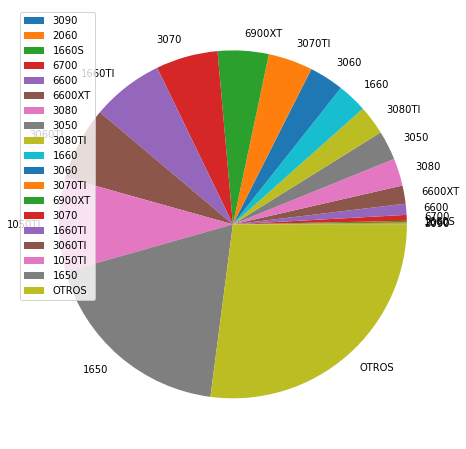

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('resultadofinal.csv')
# create dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
 

dfstock = round(df.groupby(['modelo'])[['stock']].sum())
dfstock = dfstock.sort_values("stock", ascending=True)
dfstock.plot(kind='pie',subplots=True, figsize=(8, 8))
plt.ylabel("")
plt.show()





ValueError: shape mismatch: objects cannot be broadcast to a single shape

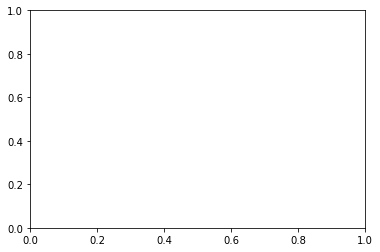

In [20]:

# Create horizontal bars
plt.barh(y_pos, df['stock'])
 
# Create names on the x-axis
plt.yticks(y_pos, df['modelo'])
 
# Show graphic
plt.show()